### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Datasets Information:`

*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating

*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)


*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use

**`Please provide your insights wherever necessary.`**

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### 1. Import the necessary packages - 2.5 marks

In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns   
import matplotlib.pyplot as plt  
sns.set(color_codes=True) 
%matplotlib inline 
#importing all the packages I might need

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
#read the Data.csv file into a dataframe called "ratings"
ratings = pd.read_csv('Data.csv')
ratings.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
#read the item.csv file into a dataframe called "movies"
movies = pd.read_csv('item.csv')
movies.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [4]:
#read the user.csv file into a dataframe called "users"
users = pd.read_csv('user.csv')
users.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


### 3. Apply info, shape, describe, and find the number of missing values in the data. Present at least 3 observations from these operations - 2.5 marks
 - Note that you will need to do it for all the three datasets seperately

In [5]:
ratings.info() #for the ratings dataframe, checking the data types and number of values for each variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [6]:
ratings.shape #check the shape (rows, columns) of the ratings dataframe

(100000, 4)

In [7]:
ratings.describe() #check the five number summary for ratings dataframe

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [8]:
#Check if there are any NaN values in the ratings dataframe
ratings.isnull().values.any()

False

**RATINGS Observations:**

* We have data on 100,000 ratings
* The ratings range from 1 to 5. 
* The mean of the ratings is just over 3.5 and the median is 4. 
* There are no null values in the ratings data

In [9]:
movies.info() #for the movies dataframe, checking the data types and number of values for each variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [10]:
movies.shape #check the shape (rows, columns) of the movies dataframe

(1681, 22)

In [11]:
movies.describe() #check the five number summary for movies dataframe

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
#Check if there are any NaN values in the movies dataframe
movies.isnull().values.any()

False

**MOVIES Observations:**

* We have data on 1,681 unique movies
* The movies data are categorized into 18 different movie genres and a category called "unknown" 
* There are no null values in the movies data

In [13]:
users.info() #for the users dataframe, checking the data types and number of values for each variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [14]:
users.shape #check the shape (rows, columns) of the users dataframe

(943, 5)

In [15]:
users.describe() #check the five number summary for users dataframe

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [16]:
#Check if there are any NaN values in the users dataframe
users.isnull().values.any()

False

**USERS Observations:**

* We have data on 943 users.
* The users range in age from 7 to 73. 
* The mean age is just over 34 years old and the median age is 31. 
* There are no null values in the users data.

### 4. Find the number of movies per genre using the item data - 2.5 marks

In [17]:
#Drop the irrelevant columns (non-genres) and sum the columns from the movies dataframe
movies.drop(['movie title','movie id','release date'], axis=1).sum()

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

**Insights:**

* We have 1 movie where the genre is "unknown"
* The genre with the most movies is Drama (725)
* The genre (other than unknown) with the fewest movies is Fantasy (22)
* We do not have an equal number of movies per genre -- there are fairly large differences in the number of movies per genre. 

### 5. Drop the movie where the genre is unknown - 2.5 marks

In [18]:
#I wanted to check my logic to locate movies where the genre is unknown
movies[movies['unknown'] == 1]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1371,1373,Good Morning,4-Feb-1971,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#Because my check above worked, I can use that logic and add .index to give the index location that should be dropped
#This line drops any row (index location) where the column 'unknown' is equal to 1, meaning the movie has an unknown genre.
movies.drop(movies[movies['unknown'] == 1].index)

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


**Insights:**

* There is only 1 movie, Good Morning, which has an unknown genre
* Good morning is at the 1371 index location

### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [20]:
#Create a list of the genres so that I can sum them in the next step
genres_list = list(movies)
genres_list.remove('movie id')
genres_list.remove('movie title')
genres_list.remove('release date')

print(genres_list)

['unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


In [21]:
#Create a column called "genres_sum" which calculates the total of the genres columns
movies["genres_sum"] = movies[genres_list].sum(axis = 1)

#Display the movie name and number of genres in a dataframe
movies_genres_sum = movies[['movie title', 'genres_sum']]
movies_genres_sum

,movie title,genres_sum
0,Toy Story,3
1,GoldenEye,3
2,Four Rooms,1
3,Get Shorty,3
4,Copycat,3
...,...,...
1676,Mat' i syn,1
1677,B. Monkey,2
1678,Sliding Doors,2
1679,You So Crazy,1


In [22]:
#find number of rows with a value greater than 1 in column 'genres_sum'
multi_genres = movies[movies['genres_sum'] > 1].shape[0]

print ('Number of movies with multiple genres: ', multi_genres)

Number of movies with multiple genres:  849


**Insights:**

* There are 849 movies with multiple genres
* There are 832 movies with only 1 genre (or unknown)
* More than half of the movies in the movies dataframe half multiple genres assigned


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age and countplot for release year, ratings, *

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

In [23]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


Frequency of each rating


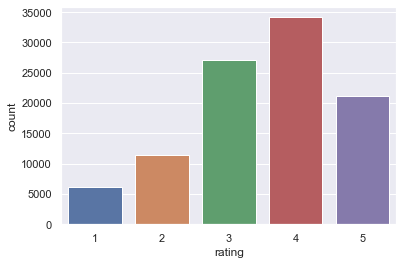

In [24]:
#Univariate plot of 'rating' using countplot
print("Frequency of each rating")
sns.countplot(x='rating', data=ratings);

Frequency of each age in the user population


/Users/mikegroesser/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


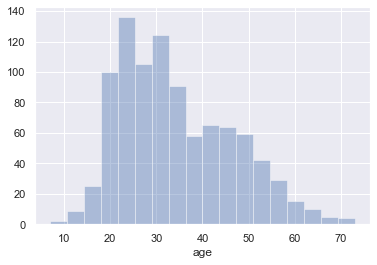

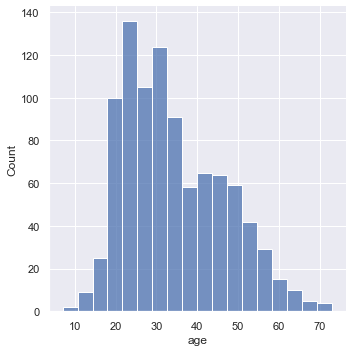

In [25]:
#Univariate plot of 'Age' using distplot
print("Frequency of each age in the user population")
sns.distplot(users['age'], kde=False);

#Because of the deprecated function warning, I also chose to create a displot
sns.displot(users['age']);

Frequency of movies by release year


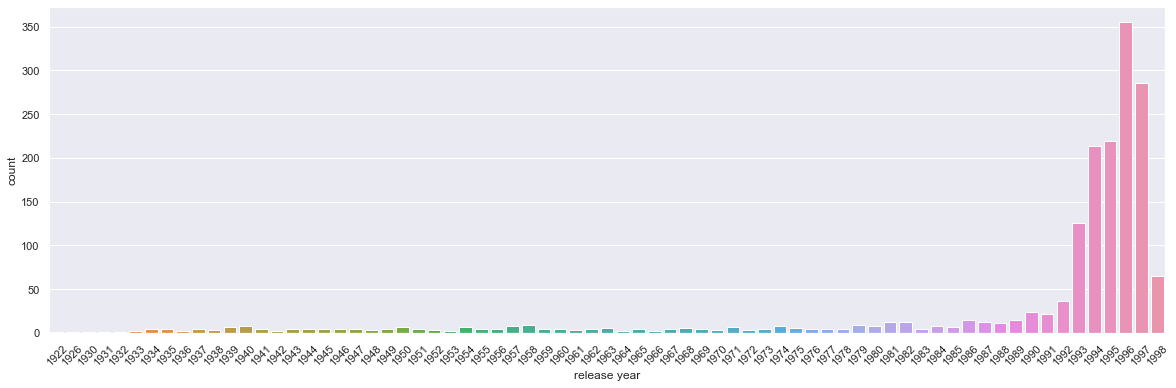

In [26]:
#Univariate plot of the release year using countplot
#I chose to use the pandas datetime conversion for practice because that's what I'll most likely do in my work

movies['release date'] = pd.to_datetime(movies['release date']) #convert 'release date' to datetime format
movies['release year'] = movies['release date'].dt.year #create new 'release year' column in the movies dataframe and populate with year from 'release date'

print("Frequency of movies by release year")
sns.set({'figure.figsize': (20,6)}) #make the plot wider
sns.countplot(x='release year', data=movies) #create a countplot of the release year
plt.xticks(rotation=45); #rotate the x axis labels so they don't overlap

Comparison of genders in the user data


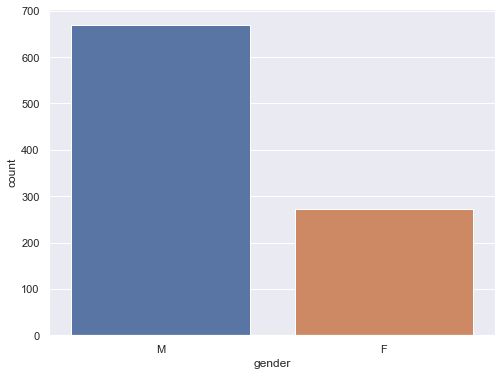

In [27]:
#Univariate plot of 'gender' from the users dataframe

print("Comparison of genders in the user data")
sns.set({'figure.figsize': (8,6)}) #make the figure smaller again
sns.countplot(x='gender', data=users); #create a countplot comparing the number of males and females in the users dataframe

Count of users by occupation


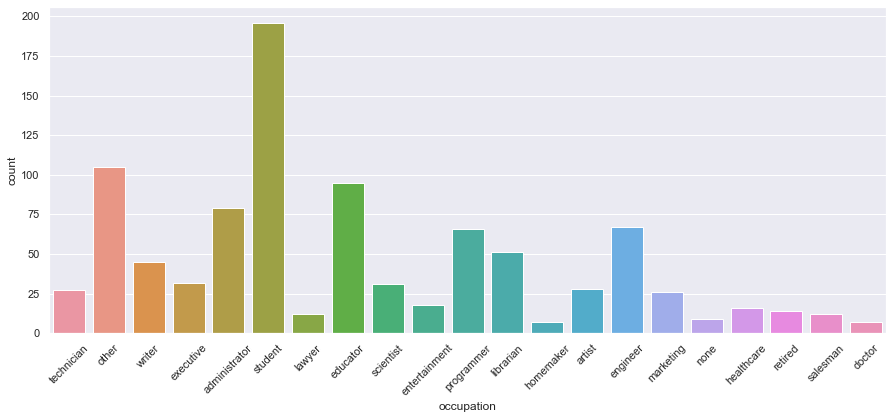

In [28]:
#Univariate plot of "occupation" from the users dataframe

print("Count of users by occupation")
sns.set({'figure.figsize': (15,6)}) #make the figure wider again
sns.countplot(x='occupation', data=users); #create a countplot comparing the frequency of each occupation in the users dataframe
plt.xticks(rotation=45); #rotate the x axis labels so they don't overlap

**Insights:**

* There more the twice as many males than females in the users data.
* The users data may skew younger. The figure seems to have more users in their 20s and 30s than the rest of the age groups. 
* Most of the movies in the movies data were released in the 1990s.
* Student is the most common occupation among the users


### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use item dataset to get count of movies released in a particular year, store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.

In [29]:
genre_popularity = movies.groupby('release year').sum()[genres_list] #create a new dataframe where the rows are years and columns are the total movies released in each genre per year
genre_popularity

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release year,,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1930,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1931,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6
1995,0,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2
1996,0,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2


In [30]:
genre_popularity['total_movies'] = genre_popularity[genres_list].sum(axis = 1) #Create a column to sum the movies released each year
genre_popularity.tail()

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total_movies
release year,,,,,,,,,,,,,,,,,,,,
1994,0,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6,353
1995,0,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2,381
1996,0,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2,559
1997,0,46,20,3,22,87,30,6,113,4,2,8,5,18,51,13,54,14,0,496
1998,0,12,3,0,1,13,7,3,33,1,2,4,1,3,11,5,18,0,0,117


In [31]:
popularity = genre_popularity.div(genre_popularity['total_movies'], axis=0) * 100 #divide number of movies in a genre in a given year by the total number of movies in that year

popularity.tail()

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total_movies
release year,,,,,,,,,,,,,,,,,,,,
1994,0.0,8.498584,3.682720,1.133144,4.249292,23.229462,2.266289,2.549575,27.478754,0.849858,0.000000,2.266289,0.566572,0.566572,9.915014,1.983003,7.082153,1.983003,1.699717,100.0
1995,0.0,10.498688,5.774278,1.574803,5.511811,16.535433,2.887139,1.312336,23.359580,0.787402,0.262467,3.674541,0.787402,1.312336,9.711286,3.937008,10.236220,1.312336,0.524934,100.0
1996,0.0,7.871199,4.293381,1.610018,3.756708,19.320215,3.756708,3.220036,30.411449,1.073345,0.178891,1.967800,1.610018,1.073345,6.797853,2.683363,8.407871,1.610018,0.357782,100.0
1997,0.0,9.274194,4.032258,0.604839,4.435484,17.540323,6.048387,1.209677,22.782258,0.806452,0.403226,1.612903,1.008065,3.629032,10.282258,2.620968,10.887097,2.822581,0.000000,100.0
1998,0.0,10.256410,2.564103,0.000000,0.854701,11.111111,5.982906,2.564103,28.205128,0.854701,1.709402,3.418803,0.854701,2.564103,9.401709,4.273504,15.384615,0.000000,0.000000,100.0


Popularity of each genre over the years


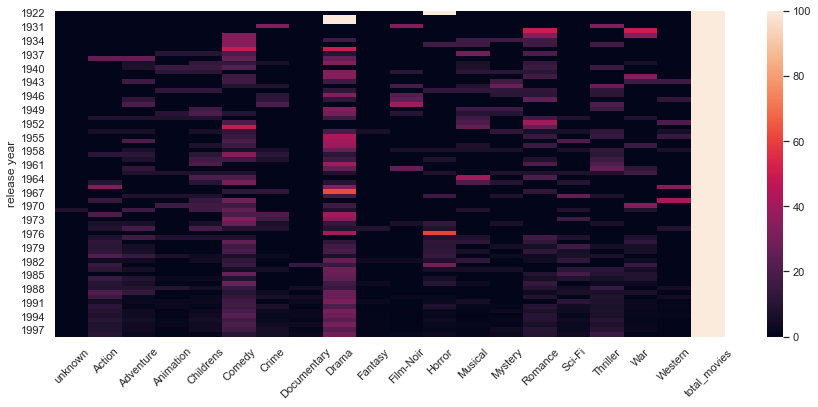

In [32]:
print("Popularity of each genre over the years")
sns.heatmap(popularity)
sns.set({'figure.figsize': (15,7)}) #make the figure taller 
plt.xticks(rotation=45); #rotate the x axis labels so they don't overlap;

**Insights:**

* Drama seems to be the most popular genre over the years, followed by Comedy. 
* Documentary and Fantasy appear to be the least popular over the years
* Horror movies may have been unusually popular in 1976


### 9. Find the top 25 movies in terms of average ratings for movies that have been rated more than 100 times - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [33]:
ratings.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [34]:
gb_movie_count = ratings.groupby(['movie id'], as_index=False).count() #group by movie id and count number of ratings for each movie
gb_movie_count.drop(['user id', 'timestamp'], axis=1, inplace=True) #drop unnecessary columns from the new dataframe
gb_movie_count.rename(columns={'rating': 'rating_count'}, inplace=True) #rename ratings column to ratings_count
print("Dataframe showing count of ratings for every movie")
gb_movie_count

Dataframe showing count of ratings for every movie


,movie id,rating_count
0,1,452
1,2,131
2,3,90
3,4,209
4,5,86
...,...,...
1677,1678,1
1678,1679,1
1679,1680,1
1680,1681,1


In [35]:
gb_movie_avg = ratings.groupby(['movie id'], as_index=False).mean() #group by movie id and calculate the mean rating for each movie
gb_movie_avg.drop(['user id', 'timestamp'], axis=1, inplace=True) #drop unnecessary columns from new dataframe
gb_movie_avg.rename(columns={'rating': 'rating_avg'}, inplace=True) #rename ratings column to ratings_avg
print("Dataframe showing average rating for every movie")
gb_movie_avg

Dataframe showing average rating for every movie


,movie id,rating_avg
0,1,3.878319
1,2,3.206107
2,3,3.033333
3,4,3.550239
4,5,3.302326
...,...,...
1677,1678,1.000000
1678,1679,3.000000
1679,1680,2.000000
1680,1681,3.000000


In [36]:
movies_filtered = gb_movie_count[gb_movie_count['rating_count'] > 100] #filter out movies with fewer than 100 ratings
movies_filtered

,movie id,rating_count
0,1,452
1,2,131
3,4,209
6,7,392
7,8,219
...,...,...
925,926,101
927,928,104
1015,1016,137
1027,1028,148


In [37]:
#Merge the dataframe of movies with at least 100 ratings with the dataframe containing avg ratings. Keep only movies with 100+ ratings.
merged = pd.merge(movies_filtered, gb_movie_avg, on = 'movie id', how = 'left') 
merged.sort_values(by='rating_avg', ascending = False, inplace = True) #Sort by the average rating, descending
top_25 = merged.head(25) #create a dataframe with just the top 25 highest rated movies (minimum 100 ratings)
top_25

,movie id,rating_count,rating_avg
231,408,112,4.491071
202,318,298,4.466443
91,169,118,4.466102
261,483,243,4.456790
29,64,283,4.445230
292,603,209,4.387560
7,12,267,4.385768
22,50,583,4.358491
99,178,125,4.344000
72,134,198,4.292929


In [38]:
top_25m = pd.merge(top_25, movies, on = 'movie id', how = 'left') #Merge top 25 data frame with movies dataframe to get the movie title
top_25final = top_25m[['movie id', 'movie title', 'rating_avg', 'rating_count']] #create new datafarme with relevant columns to display top 25 highest rated
top_25final

,movie id,movie title,rating_avg,rating_count
0,408,"Close Shave, A",4.491071,112
1,318,Schindler's List,4.466443,298
2,169,"Wrong Trousers, The",4.466102,118
3,483,Casablanca,4.456790,243
4,64,"Shawshank Redemption, The",4.445230,283
5,603,Rear Window,4.387560,209
6,12,"Usual Suspects, The",4.385768,267
7,50,Star Wars,4.358491,583
8,178,12 Angry Men,4.344000,125
9,134,Citizen Kane,4.292929,198


### 10. Check for the validity of the below statements with respect to the data provided - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

**Please pay attention to what should be the denominator while calculating percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [39]:
m1 = pd.merge(users, ratings, on = 'user id', how = 'left') #merge users and ratings on 'user id'
m2 = pd.merge(m1, movies, on = 'movie id', how = 'left') #merge the new merged dataframe and movies on 'movie id'
m2.head()

,user id,age,gender,occupation,zip code,movie id,rating,timestamp,movie title,release date,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genres_sum,release year
0,1,24,M,technician,85711,61,4,878542420,Three Colors: White,1994-01-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1994.0
1,1,24,M,technician,85711,189,3,888732928,"Grand Day Out, A",1992-01-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1992.0
2,1,24,M,technician,85711,33,4,878542699,Desperado,1995-01-01,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,1995.0
3,1,24,M,technician,85711,160,4,875072547,Glengarry Glen Ross,1992-01-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1992.0
4,1,24,M,technician,85711,20,4,887431883,Angels and Insects,1995-01-01,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1995.0


In [40]:
g1 = m2.groupby(['gender'], as_index = False).count() #group by gender and count the total number of ratings each
g2 = g1[['gender','rating']].rename(columns = {'rating' : 'total_ratings'}) #change column name to "total_ratings" to more accurately reflect contents
g2

,gender,total_ratings
0,F,25740
1,M,74260


In [41]:
g3 = m2.groupby(['gender'], as_index = False).sum() #sum values in the dataframe by column
g3.drop(['user id', 'age', 'timestamp', 'movie id', 'rating'], axis=1, inplace=True) #drop unnecessary columns
g3

,gender,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genres_sum,release year
0,F,0.0,5442.0,3141.0,995.0,2232.0,8068.0,1794.0,187.0,11008.0,...,1197.0,1442.0,1314.0,5858.0,2629.0,5086.0,2189.0,371.0,53701.0,51177156.0
1,M,1.0,20147.0,10612.0,2610.0,4950.0,21764.0,6261.0,571.0,28887.0,...,4120.0,3512.0,3931.0,13603.0,10101.0,16786.0,7209.0,1483.0,158885.0,147600574.0


In [42]:
g4 = pd.merge(g2, g3, on = 'gender', how = 'left') #merge g2 dataframe (total ratings by gender) with g3 dataframe (total ratings per genre by gender)
g4.set_index('gender', inplace=True) #set index equal to gender to make it look cleaner
g4

,total_ratings,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genres_sum,release year
gender,,,,,,,,,,,,,,,,,,,,,
F,25740,0.0,5442.0,3141.0,995.0,2232.0,8068.0,1794.0,187.0,11008.0,...,1197.0,1442.0,1314.0,5858.0,2629.0,5086.0,2189.0,371.0,53701.0,51177156.0
M,74260,1.0,20147.0,10612.0,2610.0,4950.0,21764.0,6261.0,571.0,28887.0,...,4120.0,3512.0,3931.0,13603.0,10101.0,16786.0,7209.0,1483.0,158885.0,147600574.0


In [43]:
g4['Drama'].div(g4['total_ratings']) #Divide 'Drama' by 'total_ratings' to cacluate percentage of total by gender

gender
F    0.427661
M    0.388998
dtype: float64

In [44]:
g4['Sci-Fi'].div(g4['total_ratings']) #Divide 'Sci-Fi' by 'total_ratings' to cacluate percentage of total by gender

gender
F    0.102137
M    0.136022
dtype: float64

In [45]:
g4['Romance'].div(g4['total_ratings']) #Divide 'Romance' by 'total_ratings' to cacluate percentage of total by gender

gender
F    0.227584
M    0.183181
dtype: float64

**Conclusion:**
    
* Men watch more drama than women -- FALSE, 43% of women's ratings were of Drama movies, compared to only 39% of men's
* Women watch more Sci-Fi than men -- FALSE, 14% of men's ratings were of Sci-Fi movies, compared to only 10% of women's
* Men watch more Romance than women -- FALSE, 23% of women's ratings were of Romance movies, compared to only 18% of men's